# Лабораторная 1
Гаврилов Данил, Алентьев Кирилл


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy as sp

# Задание 1
Мы решили выбрать распределение: $U[0; 10]$ - равномерное распределение на отрезке [0; 10]. У этого распределения существуют все моменты.


## Функции

In [ ]:

A = 0.0
B = 10.0

# Плотность нормального распределения N(0,1)
def standart_normal(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp((-x**2)/2)

# Гамма функция Г(k,lam)
def gamma(k, lam, x):
    return np.exp(-(lam) * x) * ((lam)**k) * (x**(k - 1)) / math.factorial(k - 1)

# Функция распределения непрерывного равномерного распределения U(A,B)
def F(x):
    if x < A:
        return 0
    # должно быть x >= B ??????
    if (x > B):
        return 1
    return (x - A) / (B - A)
# Выборочный момент несмещённый и состоятельный (E(^Ak) = Ak; Var(^Ak) -> Ak по вероятности при n -> inf)
# Выборочное среднее (^A1 - первый выборочный момент)
def sample_average(sample):
    return sum(sample) / sample.size

# Выборочная дисперсия (^mu2 = ^A1 - ^A2 - второй выборочный центральный момент)
def sample_dispersion(sample):
    sample = (sample - sample_average(sample)) ** 2
    return sum(sample) / sample.size

# Медиана вариационного ряда
# Выборочная медиана - это выборочный квантиль порядка 1/2
def sample_median(sample):
    sample = np.sort(sample)
    if (sample.size % 2 == 1):
        return sample[sample.size // 2]
    else:
        return (sample[sample.size // 2] + sample[sample.size // 2 - 1]) / 2


# q_a - Квантиль порядка a - это когда F(q_a) = a; в общем случае F^(-1)(a) = inf{x∈R: F(x)>=a} - квантильная функция
# Выборочный квантиль: a∈(0, 1), тогда существует k: (k-1)/n < a <= k/n <=> (k-1)<na<=k.
# Тогда для na!∈N X_([na] + 1) - выборочный квантиль порядка a
def sample_quantile(sample, order):
    sample = np.sort(sample)
    return sample[math.floor(sample.size * order)]

# Эмпирическая функция распределения выборки
def get_distribution_func(sample):
    def func(t):
        result = 0
        for i in sample:
            if i <= t:
                result += 1
        return result / sample.size
    return func

def first_extreme_member_function(sample):
    sample = np.sort(sample)
    return sample.size * F(sample[1])

def second_extreme_member_function(sample):
    sample = np.sort(sample)
    return sample.size * (1 - F(sample[sample.size - 1]))

## Асимптотическая нормальность выборочного среднего

$$\sqrt{n} \frac{\overline{X} - EX}{\sqrt{VarX}} \overset{d}{→} N(0, 1)$$

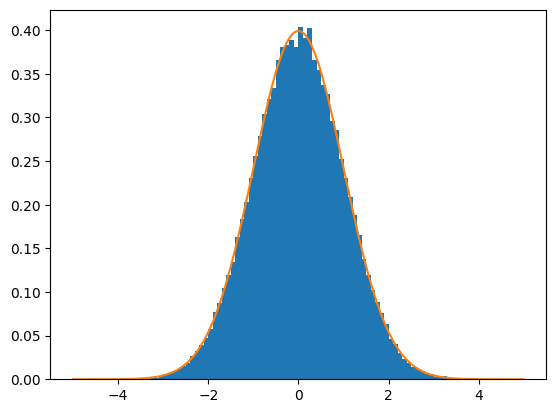

In [ ]:
def check_average():
    SAMPLE_COUNT = 100000
    n = 100

    results = np.array([0.0] * SAMPLE_COUNT)
    for i in range(SAMPLE_COUNT):
        results[i] = sample_average(np.random.uniform(A, B, n)) #Генерация равномерного распределения

    e = (A + B) / 2 # Матожидание равномерного распределения
    var = (B - A)**2 / 12 # Дисперсия равномерного распределния
    results = (results - e) * (n / var)**0.5 # Выборочное среднее

    fig, ax1 = plt.subplots(1, 1)
    ax1.hist(results, range = (-5, 5), bins = 100, density = True)
    x = np.sort(np.random.uniform(-5, 5, 1000))
    ax1.plot(x, standart_normal(x)) # Рисуем Гистограмму Выборочного среднего и график плотности нормального распределения N(0,1)

check_average()

## Асимптотическая нормальность выборочной дисперсии

$$
\sqrt{n} \frac{S_*^2 - σ^2}{\sqrt{μ_4 - σ^4}}\overset{d}{→} N(0, 1)
$$

$$
μ_4 = ∫_0^{10}\frac{(x - 5)^4}{10} = \frac{(x - 5)^5}{50}|_0^{10} = 5^3 = 125
$$

#### Матожидание выборочной дисперсии:

$$
E(S_*^2) = \frac{n - 1}{n} * σ^2 , σ^2 = \mu_2
$$

Дисперсия смещённая так как не равна σ^2, однако ассимптотически дисперсия не смещённая так как существует:
$$
S^2 = \frac{n}{n - 1} * S_*^2
$$

#### Дисперсия выборочной дисперсии:
$$
Var(S_*^2) = \frac{(n - 1)^2}{n^3} * (\mu_4 - \frac{n - 3}{n - 1} * σ^4) , σ^2 = \mu_2
$$

Выборочная дисперсия состоятельна так как:
$$
S_*^2 \overset{p}{→} σ^2
$$

# Всё это по следствию из многомерной ЦПТ

$$
\frac{\Sigma * X_i - n\mu}{\sqrt{n}} -> N(0, \Sigma)
$$

## Следствия

$$
A_n = (\hat{\alpha}_1, ... , \hat{\alpha}_r)
$$
$$
1. \frac{nA_n - n\alpha}{\sqrt{n}} -> N(0, 1)
$$
$$
2. \sigma^2 = \nabla^T\phi(\alpha)\Sigma\nabla\phi(\alpha) => \sqrt{n}(\phi(A_n) - \phi(\alpha)) -> N(0, \sigma^2)
$$
$$
3. \sqrt{n}\frac{\phi(A_n) - \phi(\alpha)}{\sigma(A_n)} -> N(0,1)
$$

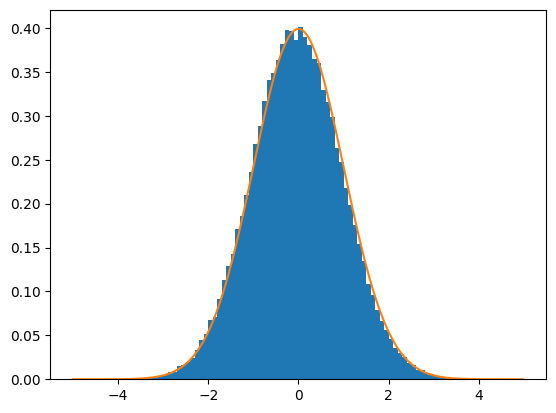

In [ ]:


def check_dispersion():
    SAMPLE_COUNT = 100000
    n = 1000

    results = np.array([0.0] * SAMPLE_COUNT)
    for i in range(SAMPLE_COUNT):
        results[i] = sample_dispersion(np.random.uniform(0, 10, n))

    var = 100 / 12
    moment_4 = 125
    results = (np.sqrt(n) * (results - var)) / np.sqrt(moment_4 - var**2)
    fig, ax1 = plt.subplots(1, 1)

    ax1.hist(results, range = (-5, 5), bins = 100, density = True)

    x = np.sort(np.random.uniform(-5, 5, 1000))
    ax1.plot(x, standart_normal(x))

check_dispersion()

## Асимптотическое поведение выборочной квантили порядка $\frac{1}{2}$

$$
\sqrt{n} \cdot f(q_{\frac{1}{2}}) \cdot \frac{X_{(\frac{1}{2})} - q_{\frac{1}{2}}}{\sqrt{\frac{1}{2}(1 - \frac{1}{2})}}\overset{d}{→} N(0, 1)
$$

По теореме об ассимптотическом поведении среднего члена вариациаонного ряда

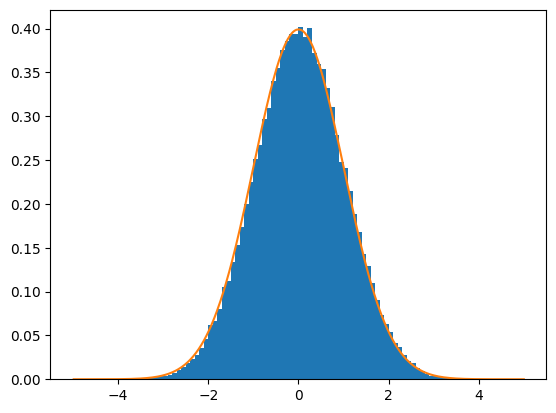

In [ ]:
def check_quantile():
    SAMPLE_COUNT = 100000
    n = 1000

    results = np.array([0.0] * SAMPLE_COUNT)
    for i in range(SAMPLE_COUNT):
        results[i] = sample_quantile(np.random.uniform(A, B, n))

    results = (results - 5) * np.sqrt(n) * 0.1 / 0.5

    fig, ax1 = plt.subplots(1, 1)
    ax1.hist(results, range = (-5, 5), bins = 100, density = True)
    x = np.sort(np.random.uniform(-5, 5, 1000))
    ax1.plot(x, standart_normal(x))

check_quantile()

## Асимптотическое поведение крайних членов ряда
$$
n F(X_{(2)}) → Γ(2, 1)
$$
$$
n (1 - F(X_{(n)})) → Γ(1, 1)
$$

По теореме об ассимптотическом поведении крайних членов ряда

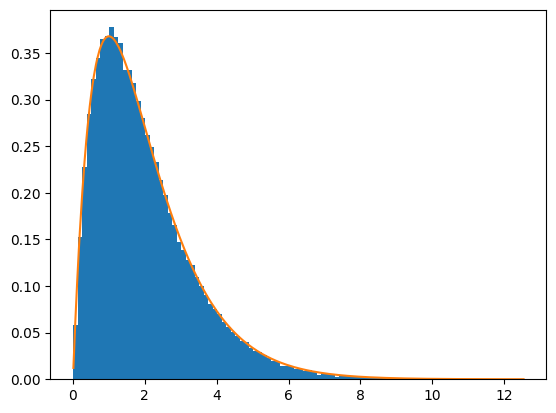

In [ ]:
def check_first_func():
    SAMPLE_COUNT = 100000
    n = 100

    results = np.array([0.0] * SAMPLE_COUNT)
    for i in range(SAMPLE_COUNT):
        results[i] = first_extreme_member_function(np.random.uniform(A, B, n))

    fig, ax1 = plt.subplots(1, 1)
    ax1.hist(results, bins = 100, density = True)
    x = np.sort(np.random.uniform(min(results), max(results), 1000))
    ax1.plot(x, gamma(2, 1, x))

check_first_func()

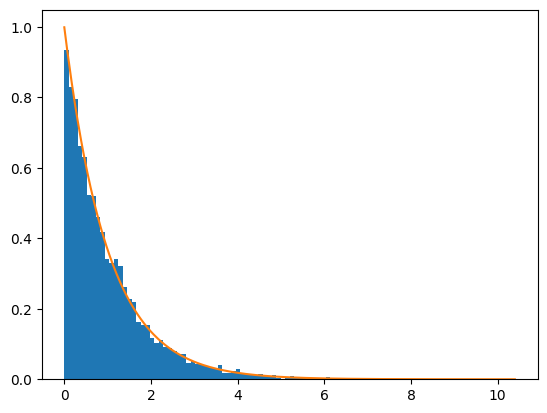

In [ ]:
def check_second_func():
    SAMPLE_COUNT = 10000
    n = 1000

    results = np.array([0.0] * SAMPLE_COUNT)
    for i in range(SAMPLE_COUNT):
        results[i] = second_extreme_member_function(np.random.uniform(A, B, n))

    fig, ax1 = plt.subplots(1, 1)
    ax1.hist(results, bins = 100, density = True)
    x = np.sort(np.random.uniform(min(results), max(results), 1000))
    ax1.plot(x, gamma(1, 1, x))

check_second_func()

# Задание 2. Вариант 1

In [ ]:
f = open('iris.csv', 'r')
titles = f.readline()
data = f.readlines()
data = [x.replace('"', "", 2).replace("\n", "").split(",") for x in data]

def calculate_everything(sample):
    sample = np.array(sample)
    print("Выборочное среднее:", sample_average(sample))
    print("Выборочная дисперсия:", sample_dispersion(sample))
    print("Выборочная медиана:", sample_median(sample))
    print("Выборочный квантиль порядка 2/5:", sample_quantile(sample, 2/5))

    fig, ax1= plt.subplots(1, 1)
    fig2, ax2 = plt.subplots(1, 1)
    fig3, ax3 = plt.subplots(1, 1)

    x = np.sort(np.random.uniform(min(sample) - 5, max(sample) + 5, 1000))
    f = get_distribution_func(sample)
    y = [f(xs) for xs in x]
    ax1.plot(x, y)
    ax2.hist(sample)
    ax3.boxplot(sample)

Посчитаем количество экземпляров разных видов цветков. Получаем, что в датасете представлены 3 вида цветков: setosa, versicolor, virginica, притом в равном количестве.

In [ ]:
kinds = dict()
for entry in data:
    if (entry[-1] in kinds):
        kinds[entry[-1]] += 1
    else:
        kinds[entry[-1]] = 1

for name in kinds.keys():
    print(name, kinds[name])

setosa 50
versicolor 50
virginica 50


Значения и графики для всей совокупности

Выборочное среднее: 23.616933333333332
Выборочная дисперсия: 47.59009726222225
Выборочная медиана: 22.5
Выборочный квантиль порядка 2/5: 20.34


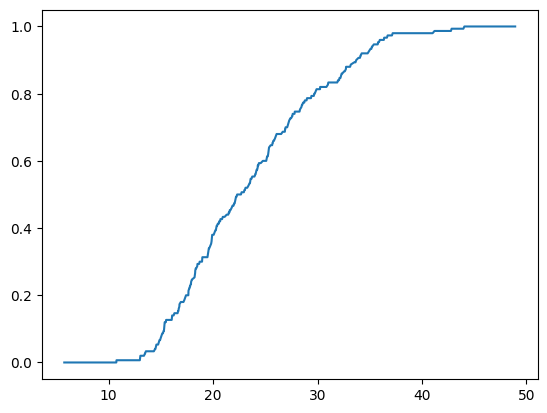

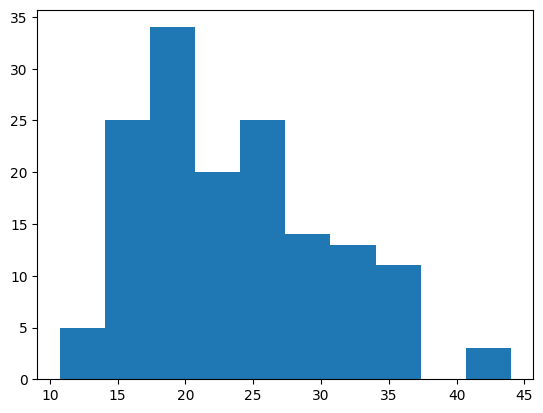

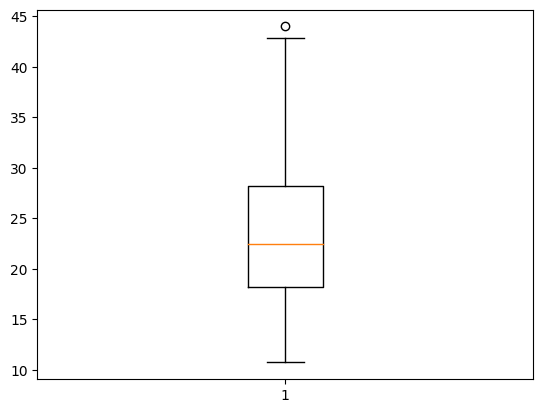

In [ ]:
all_area = [float(x[0]) * float(x[1]) + float(x[2]) * float(x[3]) for x in data]
calculate_everything(np.array(all_area))

Значения и графики для вида setosa

Выборочное среднее: 17.623400000000004
Выборочная дисперсия: 8.761258440000004
Выборочная медиана: 17.66
Выборочный квантиль порядка 2/5: 16.759999999999998


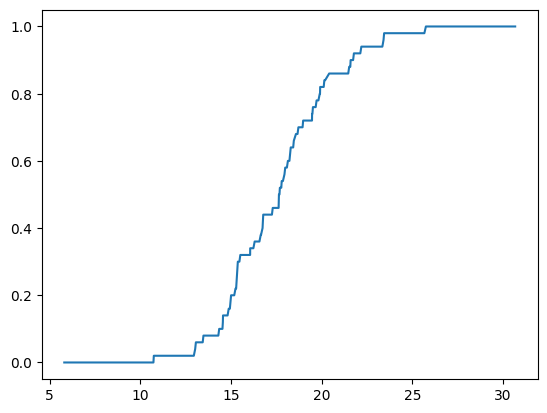

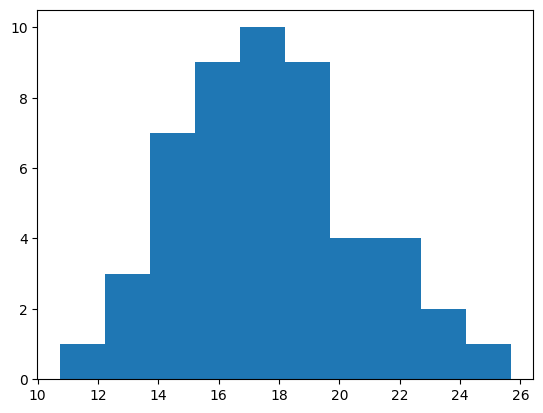

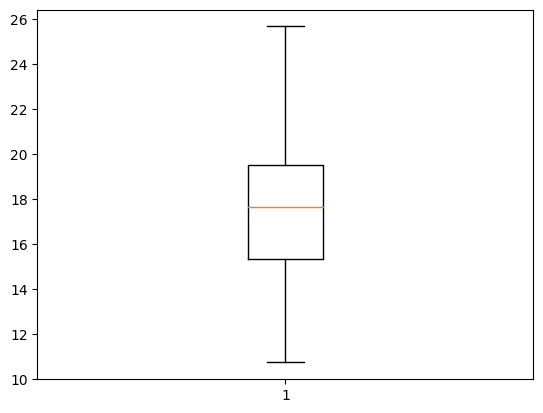

In [ ]:
setosa_area = [float(x[0]) * float(x[1]) + float(x[2]) * float(x[3]) for x in list(filter(lambda s: s[4] == "setosa", data))]
calculate_everything(np.array(setosa_area))

Значение и графики для вида versicolor

Выборочное среднее: 22.246600000000004
Выборочная дисперсия: 15.517426439999998
Выборочная медиана: 22.21
Выборочный квантиль порядка 2/5: 21.29


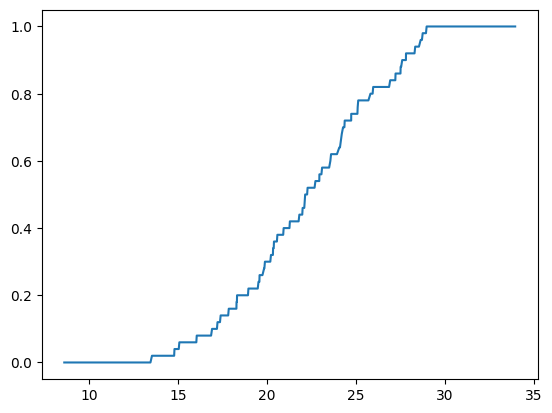

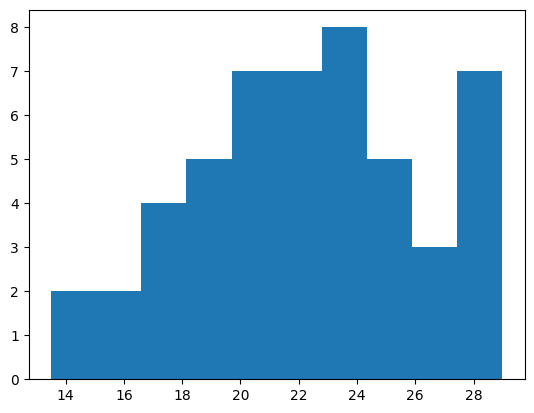

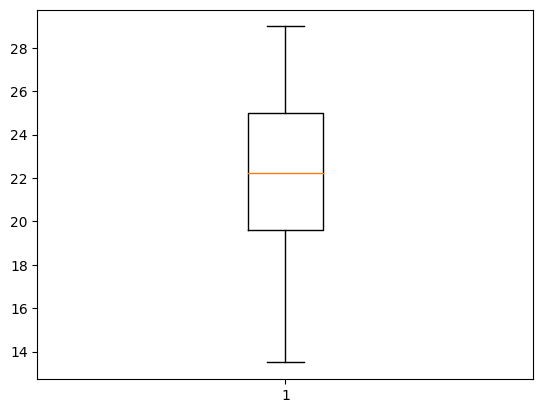

In [ ]:
versicolor_area = [float(x[0]) * float(x[1]) + float(x[2]) * float(x[3]) for x in list(filter(lambda s: s[4] == "versicolor", data))]
calculate_everything(np.array(versicolor_area))

Значения и графики для вида virginica

Выборочное среднее: 30.9808
Выборочная дисперсия: 26.464819359999996
Выборочная медиана: 31.475
Выборочный квантиль порядка 2/5: 29.740000000000002


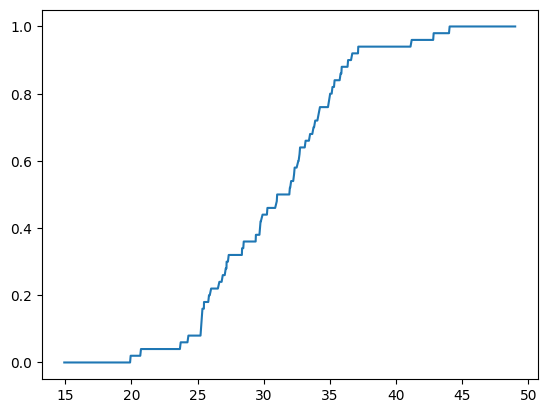

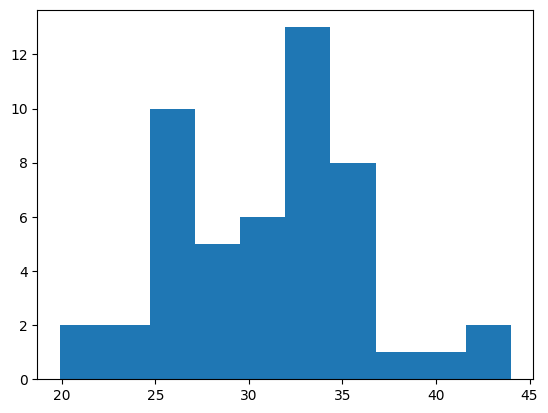

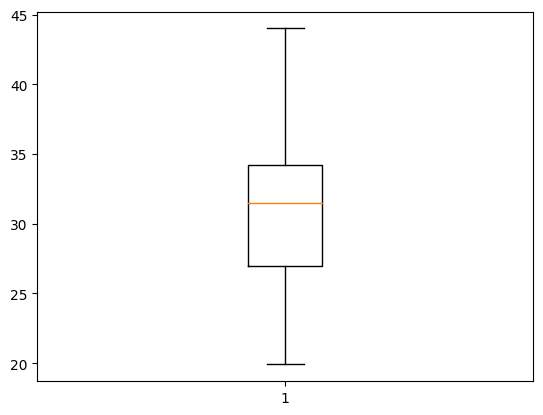

In [ ]:
virginica_area = [float(x[0]) * float(x[1]) + float(x[2]) * float(x[3]) for x in list(filter(lambda s: s[4] == "virginica", data))]
calculate_everything(np.array(virginica_area))

Выборочное среднее: 10.0
Выборочная дисперсия: 30.0
Выборочная медиана: 10
Выборочный квантиль порядка 2/5: 8


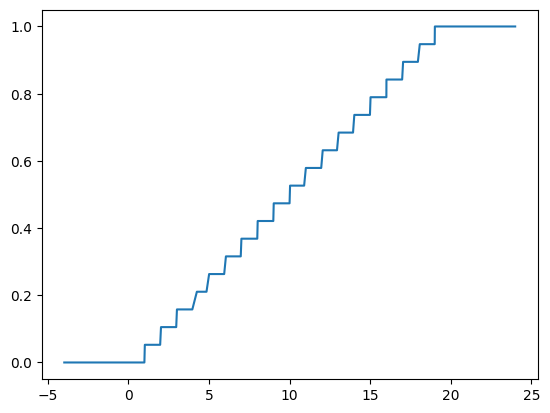

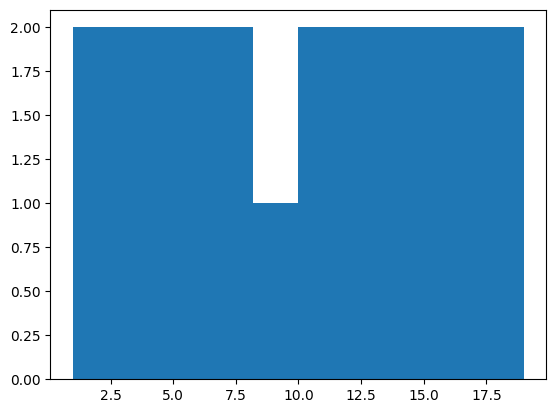

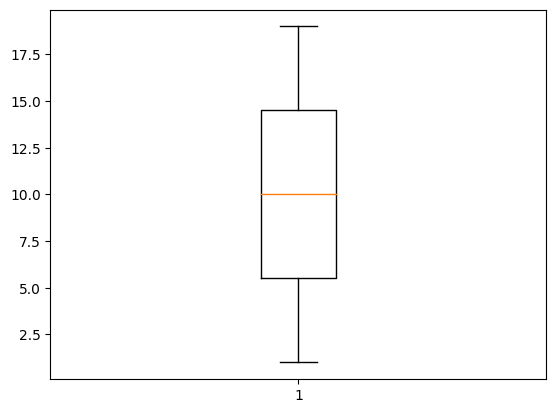

In [ ]:
calculate_everything(np.array(range(1, 20)))